# Data preparation

## Load the data

In [1073]:
import pandas as pd

Load transaction data

In [1074]:
transact_data = pd.read_csv("./data/QVI_transaction_data.csv")

Load customer data

In [1075]:
cust_data = pd.read_csv("./data/QVI_purchase_behaviour.csv")

In [1076]:
pd.set_option('display.max_rows', None)

## Transaction data

In [1077]:
transact_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [1078]:
transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [1079]:
transact_data.isna().sum().sum()

0

So there are zero null values.

### Chaging the date format

In [1080]:
transact_data["DATE"] = pd.to_datetime(transact_data["DATE"], unit="D", origin='1899-12-30')

In [1081]:
transact_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Categorical values

`PROD_NAME` (product name) contains categorical values.

In [1082]:
transact_data["PROD_NAME"].value_counts().head()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Name: count, dtype: int64

There are 114 types of chips products.

Changing the `PROD_NAME` type to category.

In [1083]:
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].astype("category")

`STORE_NBR` (store number) is also a categorical column.

In [1084]:
transact_data["STORE_NBR"].value_counts().head()

STORE_NBR
226    2022
88     1873
93     1832
165    1819
237    1785
Name: count, dtype: int64

In [1085]:
transact_data["STORE_NBR"] = transact_data["STORE_NBR"].astype("category")

In [1086]:
transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  category      
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  category      
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(4)
memory usage: 12.9 MB


### Outliers detection

In [1087]:
import seaborn as sns

<AxesSubplot: xlabel='TOT_SALES'>

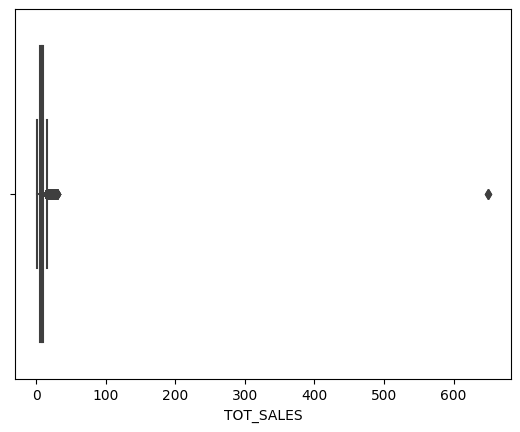

In [1088]:
sns.boxplot(data=transact_data, x=transact_data["TOT_SALES"])

Using the boxplot we can identify that observations with TOT_SALES greater than 600 can be considered outliers

In [1089]:
len(transact_data[transact_data["TOT_SALES"] >= 600])

2

<AxesSubplot: xlabel='PROD_QTY'>

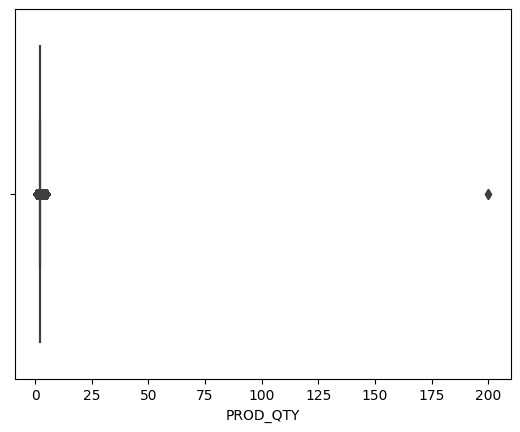

In [1090]:
sns.boxplot(data=transact_data, x=transact_data["PROD_QTY"])

Observations with `PROD_QTY` greater than 200 can be considered outliers

In [1091]:
len(transact_data[transact_data["PROD_QTY"] >= 200])

2

Removing outliers

In [1092]:
transact_data = transact_data[~(transact_data["TOT_SALES"] >= 600)]
transact_data = transact_data[~(transact_data["PROD_QTY"] >= 200)]

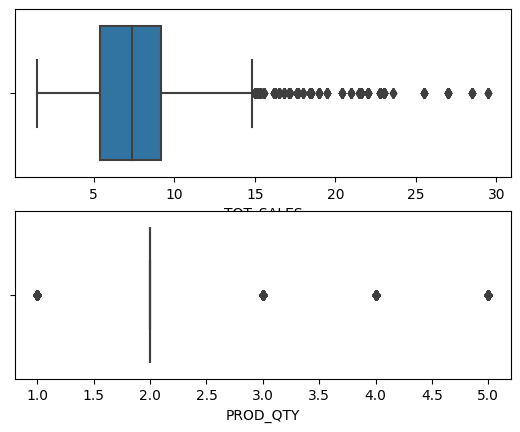

In [1093]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

sns.boxplot(data=transact_data, x=transact_data["TOT_SALES"], ax=ax[0])
sns.boxplot(data=transact_data, x=transact_data["PROD_QTY"], ax=ax[1])

plt.show()

### Removing non-chips items

In [1094]:
def remove_non_chips(str, non_chips_list):
    if str not in non_chips_list:
        return True
    else:
        return False

In [1095]:
transact_data["PROD_NAME"].unique()


['Natural Chip        Compny SeaSalt175g', 'CCs Nacho Cheese    175g', 'Smiths Crinkle Cut  Chips Chicken 170g', 'Smiths Chip Thinly  S/Cream&Onion 175g', 'Kettle Tortilla ChpsHny&Jlpno Chili 150g', ..., 'Red Rock Deli Chikn&Garlic Aioli 150g', 'RRD SR Slow Rst     Pork Belly 150g', 'RRD Pc Sea Salt     165g', 'Smith Crinkle Cut   Bolognese 150g', 'Doritos Salsa Mild  300g']
Length: 114
Categories (114, object): ['Burger Rings 220g', 'CCs Nacho Cheese    175g', 'CCs Original 175g', 'CCs Tasty Cheese    175g', ..., 'WW Supreme Cheese   Corn Chips 200g', 'Woolworths Cheese   Rings 190g', 'Woolworths Medium   Salsa 300g', 'Woolworths Mild     Salsa 300g']

There are some non-chips items in products names.

In [1096]:
non_chips_list = [
             'Doritos Salsa       Medium 300g', 
             'Doritos Salsa Mild  300g',
             'Old El Paso Salsa   Dip Chnky Tom Ht300g',
             'Old El Paso Salsa   Dip Tomato Med 300g',
             'Old El Paso Salsa   Dip Tomato Mild 300g',
             'Woolworths Medium   Salsa 300g',
             'Woolworths Mild     Salsa 300g'
]

In [1097]:
transact_data = transact_data[transact_data["PROD_NAME"].apply(lambda x: remove_non_chips(x, non_chips_list))]

In [1098]:
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].cat.remove_categories(non_chips_list)
transact_data["PROD_NAME"].unique()

['Natural Chip        Compny SeaSalt175g', 'CCs Nacho Cheese    175g', 'Smiths Crinkle Cut  Chips Chicken 170g', 'Smiths Chip Thinly  S/Cream&Onion 175g', 'Kettle Tortilla ChpsHny&Jlpno Chili 150g', ..., 'Natural ChipCo Sea  Salt & Vinegr 175g', 'Red Rock Deli Chikn&Garlic Aioli 150g', 'RRD SR Slow Rst     Pork Belly 150g', 'RRD Pc Sea Salt     165g', 'Smith Crinkle Cut   Bolognese 150g']
Length: 107
Categories (107, object): ['Burger Rings 220g', 'CCs Nacho Cheese    175g', 'CCs Original 175g', 'CCs Tasty Cheese    175g', ..., 'WW Original Stacked Chips 160g', 'WW Sour Cream &OnionStacked Chips 160g', 'WW Supreme Cheese   Corn Chips 200g', 'Woolworths Cheese   Rings 190g']

In [1099]:
transact_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249668 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            249668 non-null  datetime64[ns]
 1   STORE_NBR       249668 non-null  category      
 2   LYLTY_CARD_NBR  249668 non-null  int64         
 3   TXN_ID          249668 non-null  int64         
 4   PROD_NBR        249668 non-null  int64         
 5   PROD_NAME       249668 non-null  category      
 6   PROD_QTY        249668 non-null  int64         
 7   TOT_SALES       249668 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(4)
memory usage: 14.1 MB


### Making product names consistent

In [1100]:
pd.Series(transact_data["PROD_NAME"].unique())

0        Natural Chip        Compny SeaSalt175g
1                      CCs Nacho Cheese    175g
2        Smiths Crinkle Cut  Chips Chicken 170g
3        Smiths Chip Thinly  S/Cream&Onion 175g
4      Kettle Tortilla ChpsHny&Jlpno Chili 150g
5      Smiths Crinkle Chips Salt & Vinegar 330g
6         Grain Waves         Sweet Chilli 210g
7       Doritos Corn Chip Mexican Jalapeno 150g
8         Grain Waves Sour    Cream&Chives 210G
9         Kettle Sensations   Siracha Lime 150g
10                     Twisties Cheese     270g
11             WW Crinkle Cut      Chicken 175g
12               Thins Chips Light&  Tangy 175g
13                            CCs Original 175g
14                            Burger Rings 220g
15       NCC Sour Cream &    Garden Chives 175g
16      Doritos Corn Chip Southern Chicken 150g
17                     Cheezels Cheese Box 125g
18            Smiths Crinkle      Original 330g
19       Infzns Crn Crnchers Tangy Gcamole 110g
20         Kettle Sea Salt     And Vineg

`Doritos` and `Dorito` refers to brand `Doritos`. There are many such brands in the product name written differently.

In [1101]:
consistent_brands_name = {
    "Dorito": "Doritos",
    "French Fries": "French_Fries",
    "Grain Waves": "Grain_Waves",
    "GrnWves": "Grain_Waves",
    "Infzns": "Infuzions",
    "Natural Chip        Compny": "Natural_Chip_Co",
    "NCC": "Natural_Chip_Co",
    "Natural ChipCo": "Natural_Chip_Co",
    "Natural Chip Co": "Natural_Chip_Co",
    "Red Rock Deli": "Red_Rock_Deli",
    "RRD": "Red_Rock_Deli",
    "Smith": "Smiths",
    "Snbts": "Sunbites",
    "WW": "Woolworths"
}

In [1102]:
# transact_data["PROD_NAME"].str.replace(consistent_brands_name, regex=True)
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Dorito ", "Doritos ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("French Fries ", "French_Fries ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Grain Waves ", "Grain_Waves ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("GrnWves ", "Grain_Waves ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Natural Chip        Compny ", "Natural_Chip_Co ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("NCC ", "Natural_Chip_Co ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Natural ChipCo ", "Natural_Chip_Co ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Natural Chip Co ", "Natural_Chip_Co ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Red Rock Deli ", "Red_Rock_Deli ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("RRD ", "Red_Rock_Deli ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Smith ", "Smiths ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("Snbts ", "Sunbites ")
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].str.replace("WW ", "Woolworths ")

In [1103]:
pd.Series(transact_data["PROD_NAME"].unique())

0                            Natural_Chip_Co SeaSalt175g
1                               CCs Nacho Cheese    175g
2                 Smiths Crinkle Cut  Chips Chicken 170g
3                 Smiths Chip Thinly  S/Cream&Onion 175g
4               Kettle Tortilla ChpsHny&Jlpno Chili 150g
5               Smiths Crinkle Chips Salt & Vinegar 330g
6                  Grain_Waves         Sweet Chilli 210g
7                Doritos Corn Chip Mexican Jalapeno 150g
8                  Grain_Waves Sour    Cream&Chives 210G
9                  Kettle Sensations   Siracha Lime 150g
10                              Twisties Cheese     270g
11              Woolworths Crinkle Cut      Chicken 175g
12                        Thins Chips Light&  Tangy 175g
13                                     CCs Original 175g
14                                     Burger Rings 220g
15     Natural_Chip_Co Sour Cream &    Garden Chives ...
16               Doritos Corn Chip Southern Chicken 150g
17                             

In [1104]:
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].astype("category")
transact_data["PROD_NAME"].unique()

['Natural_Chip_Co SeaSalt175g', 'CCs Nacho Cheese    175g', 'Smiths Crinkle Cut  Chips Chicken 170g', 'Smiths Chip Thinly  S/Cream&Onion 175g', 'Kettle Tortilla ChpsHny&Jlpno Chili 150g', ..., 'Natural_Chip_Co Sea  Salt & Vinegr 175g', 'Red_Rock_Deli Chikn&Garlic Aioli 150g', 'Red_Rock_Deli SR Slow Rst     Pork Belly 150g', 'Red_Rock_Deli Pc Sea Salt     165g', 'Smiths Crinkle Cut   Bolognese 150g']
Length: 107
Categories (107, object): ['Burger Rings 220g', 'CCs Nacho Cheese    175g', 'CCs Original 175g', 'CCs Tasty Cheese    175g', ..., 'Woolworths Original Corn    Chips 200g', 'Woolworths Original Stacked Chips 160g', 'Woolworths Sour Cream &OnionStacked Chips 160g', 'Woolworths Supreme Cheese   Corn Chips 200g']

### Set brands name

Extract brand name in separate column.

In [1124]:
transact_data["BRANDS"] = transact_data["PROD_NAME"].apply(lambda x: x.split(" ")[0])

### Set weight

Extract weight in separate column.

In [1132]:
import re

transact_data["WEIGHT (g)"] = transact_data["PROD_NAME"].apply(lambda x: re.findall(r'[0-9]+', x)[0])
transact_data["WEIGHT (g)"] = transact_data["WEIGHT (g)"].astype("int")

In [1133]:
transact_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRANDS,WEIGHT (g)
0,2018-10-17,1,1000,1,5,Natural_Chip_Co SeaSalt175g,2,6.0,Natural_Chip_Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


## Customer data

In [1106]:
cust_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [1107]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Check for null values

In [1108]:
cust_data.isna().sum().sum()

0

So there are no null values.

### Check duplicate data

In [1109]:
cust_data.duplicated().sum()

0

There are no duplicate values.

### Changing data to correct format

Change the type of `LIFESTAGE`, `PREMIUM_CUSTOMER` to category type

In [1110]:
cust_data["LIFESTAGE"] = cust_data["LIFESTAGE"].astype("category")
cust_data["PREMIUM_CUSTOMER"] = cust_data["PREMIUM_CUSTOMER"].astype("category")
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   LYLTY_CARD_NBR    72637 non-null  int64   
 1   LIFESTAGE         72637 non-null  category
 2   PREMIUM_CUSTOMER  72637 non-null  category
dtypes: category(2), int64(1)
memory usage: 709.9 KB


## Merging the transaction and customer data

Merge the transaction and customer data into a single dataset.

In [1111]:
cust_transact_data = pd.merge(cust_data, transact_data, on="LYLTY_CARD_NBR")

In [1112]:
cust_transact_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural_Chip_Co SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red_Rock_Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain_Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural_Chip_Co Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,Woolworths Original Stacked Chips 160g,1,1.9


In [1113]:
cust_transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249668 entries, 0 to 249667
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    249668 non-null  int64         
 1   LIFESTAGE         249668 non-null  category      
 2   PREMIUM_CUSTOMER  249668 non-null  category      
 3   DATE              249668 non-null  datetime64[ns]
 4   STORE_NBR         249668 non-null  category      
 5   TXN_ID            249668 non-null  int64         
 6   PROD_NBR          249668 non-null  int64         
 7   PROD_NAME         249668 non-null  category      
 8   PROD_QTY          249668 non-null  int64         
 9   TOT_SALES         249668 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(4)
memory usage: 12.6 MB


## Data exploration

In [1114]:
def bar_plots(data_series, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax = data_series.plot.bar()
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticklabels(x_label, rotation=45, ha='right')

In [1115]:
def bar_plots_h(data_series, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax = data_series.plot.barh()
    #ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

### Total sales by Lifestage

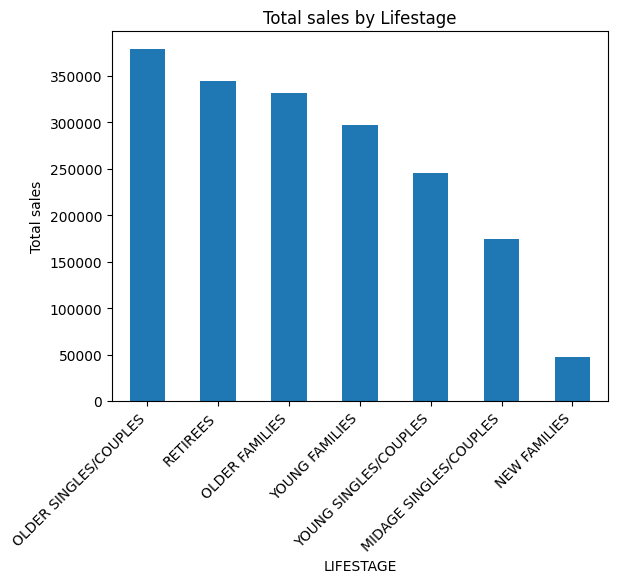

In [1116]:
# fig, ax = plt.subplots()
# ax = cust_transact_data.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False).plot.bar()
# ax.set_ylabel("Total sales")
# ax.set_title("Total sales by Lifestage")
# ax.set_xticks(rotation=45)
lifestage_sales_sr = cust_transact_data.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False)
bar_plots(
    data_series=lifestage_sales_sr,
    x_label=list(lifestage_sales_sr.index),
    y_label="Total sales",
    title="Total sales by Lifestage"
)

Older singles/couples are largest buyers followed by retires and older families. So older people spend more on chips compared to young in zed supermart.

### Total sales by customer type

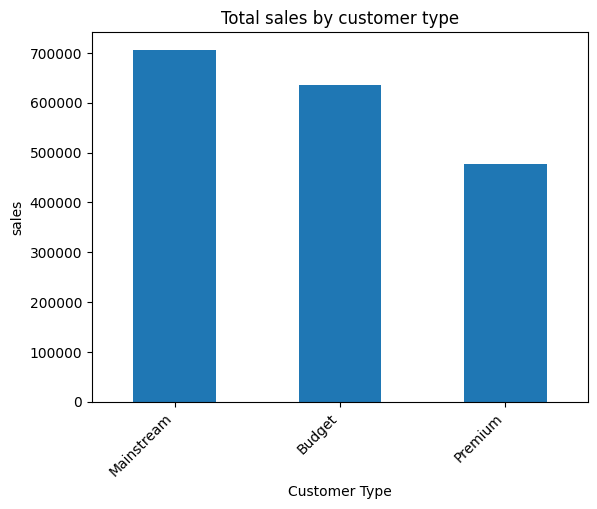

In [1117]:
cust_type_sales_sr = cust_transact_data.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().sort_values(ascending=False)
cust_type_sales_sr.index.name="Customer Type"
bar_plots(
    data_series=cust_type_sales_sr,
    x_label=list(cust_type_sales_sr.index),
    y_label="sales",
    title="Total sales by customer type"
)

Mainstream customers are largest buyers.

### Total sales by product 

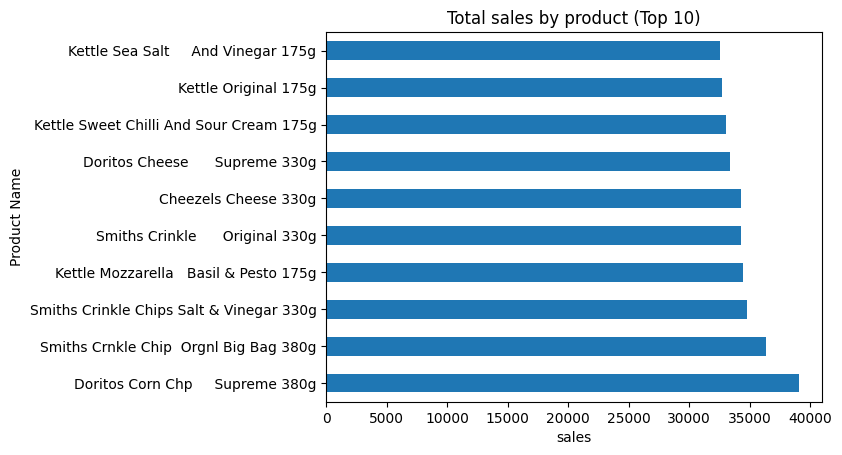

In [1118]:
prod_sales_sr = cust_transact_data.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(10)
prod_sales_sr.index.name="Product Name"
bar_plots_h(
    data_series=prod_sales_sr,
    y_label=list(prod_sales_sr.index),
    x_label="sales",
    title="Total sales by product (Top 10)",
)

Dorito Corn Chp Supreme 380g chips generate most sales.

### Total sales by store number

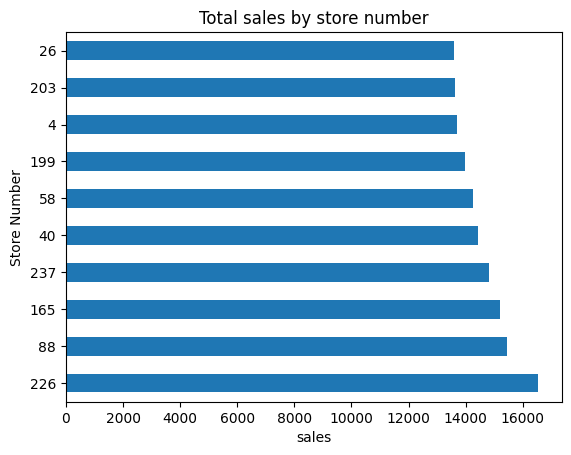

In [1119]:
store_num_sales_sr = cust_transact_data.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending=False).head(10)
store_num_sales_sr.index.name="Store Number"
bar_plots_h(
    data_series=store_num_sales_sr,
    y_label=list(store_num_sales_sr.index),
    x_label="sales",
    title="Total sales by store number",
)

### Total sales by date

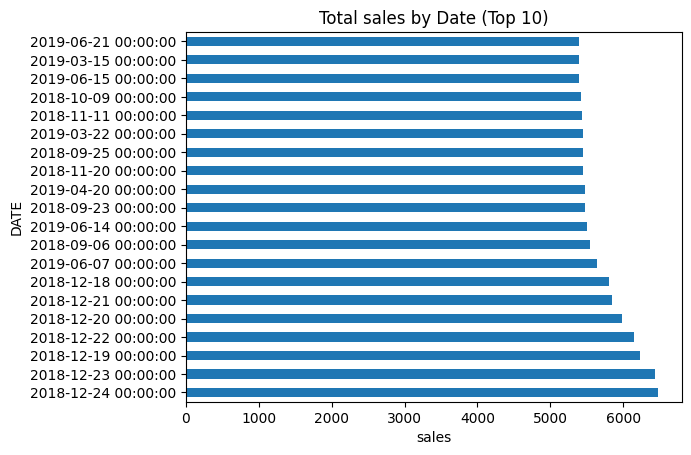

In [1120]:
date_sales_sr = cust_transact_data.groupby("DATE")["TOT_SALES"].sum().sort_values(ascending=False).head(20)

bar_plots_h(
    data_series=date_sales_sr,
    y_label=list(date_sales_sr.index),
    x_label="sales",
    title="Total sales by Date (Top 10)",
)

So most of the sales are in the 2nd half of december, during christmas.

In [1121]:
cust_transact_data["PROD_NAME"].apply(lambda x: x.split(" ")[0]).value_counts()

PROD_NAME
Kettle             41288
Smiths             31823
Doritos            25224
Pringles           25102
Red_Rock_Deli      17779
Thins              14075
Woolworths         11836
Infuzions          11057
Cobs                9693
Tostitos            9471
Twisties            9454
Grain_Waves         7740
Natural_Chip_Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Infzns              3144
Sunbites            3008
Cheetos             2927
Burger              1564
French_Fries        1418
Name: count, dtype: int64

In [1122]:
cust_transact_data["PROD_NAME"].head(25)

0                       Natural_Chip_Co SeaSalt175g
1             Red_Rock_Deli Chikn&Garlic Aioli 150g
2             Grain_Waves Sour    Cream&Chives 210G
3           Natural_Chip_Co      Hony Soy Chckn175g
4            Woolworths Original Stacked Chips 160g
5                                Cheetos Puffs 165g
6          Infuzions SourCream&Herbs Veg Strws 110g
7     Red_Rock_Deli SR Slow Rst     Pork Belly 150g
8                  Doritos Cheese      Supreme 330g
9                          Doritos Mexicana    170g
10        Grain_Waves Plus Btroot & Chilli Jam 180g
11         Infuzions SourCream&Herbs Veg Strws 110g
12          Smiths Crinkle Cut  Chips Barbecue 170g
13                 Doritos Cheese      Supreme 330g
14         Kettle Sensations   Camembert & Fig 150g
15          Doritos Corn Chip Southern Chicken 150g
16                         CCs Tasty Cheese    175g
17                    Tostitos Splash Of  Lime 175g
18                     Kettle 135g Swt Pot Sea Salt
19         K